# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).

## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'




In [41]:
N = 6
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
col = cols[N % 7]
print (col)

Time_on_Education


# I

In [203]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from scipy import stats
from scipy.stats import norm
from math import log2
import typing as tp


df = pd.read_csv("../datasets/teen_phone_addiction_dataset.csv")
data = df[col]

In [205]:
mean_val = np.mean(data)
var_val = np.var(data, ddof=1)
mode_val = stats.mode(data, keepdims=True)[0][0]
median_val = np.median(data)
quantiles = np.quantile(data, [0.25, 0.5, 0.75])
skew_val = stats.skew(data)
kurt_val = stats.kurtosis(data)  
iqr_val = stats.iqr(data)

print("1. Среднее:", mean_val)
print("2. Дисперсия:", var_val)
print("3. Мода:", mode_val)
print("4. Медиана:", median_val)
print("5. Квантили:", quantiles)
print("6. Асимметрия:", skew_val)
print("7. Эксцесс:", kurt_val)
print("8. IQR:", iqr_val)

1. Среднее: 1.0163333333333333
2. Дисперсия: 0.42034667111259977
3. Мода: 0.0
4. Медиана: 1.0
5. Квантили: [0.5 1.  1.5]
6. Асимметрия: 0.34002789690434665
7. Эксцесс: -0.39997284929065513
8. IQR: 1.0


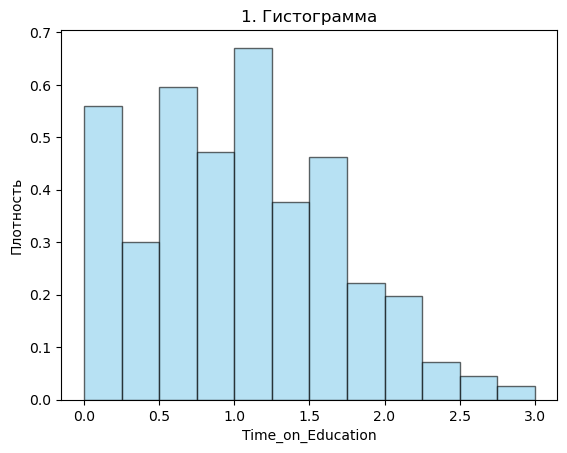

In [207]:
plt.hist(data, bins=1+int(log2(data.shape[0])), density=True, alpha=0.6, color="skyblue", edgecolor="black")
plt.title("1. Гистограмма")
plt.xlabel(col)
plt.ylabel("Плотность")
plt.show()

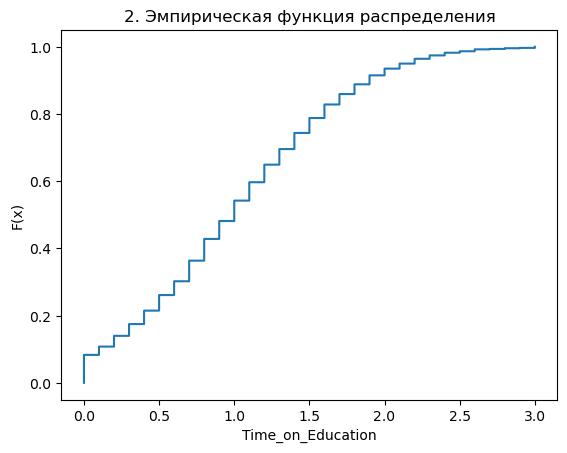

In [209]:
sorted_data = np.sort(data)
y = np.arange(1, len(data)+1) / len(data)
plt.step(sorted_data, y, where="post")
plt.title("2. Эмпирическая функция распределения")
plt.xlabel(col)
plt.ylabel("F(x)")
plt.show()

Исходя из значений ассиметрии и соотношений для медины, среднего и моды видно, что данные имеют более тяжелый хвост слева. А отрицательный эксцесс говрит о том, что у нас более плоский пик по сравнению с нормальным распределением

# II

In [243]:
from scipy.stats import norm, chi2

def chi_test(data: tp.List[float], alpha=0.05) -> bool:
    n = len(data)
    k = 1 + int(np.log2(n))
    intervals = np.linspace(min(data), max(data), k + 1)
    real_freq, bin_edges = np.histogram(data, bins=intervals)
    expected_freq = np.array([norm.cdf(bin_edges[i + 1], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) - norm.cdf(
        bin_edges[i], np.mean(data), np.sqrt(np.var(data, ddof=1, axis=0))) for i in range(k)]) * n
    chi_stat = np.sum((real_freq - expected_freq) ** 2 / (expected_freq + 1e-6))
    deg = k - 1 - 2
    crit_val = chi2.ppf(1 - alpha, deg)    
    print(chi_stat, crit_val)
    return chi_stat < crit_val
  

In [245]:
chi_test(data)

446.23249240800175 16.918977604620444


False

In [217]:
_, pval = stats.normaltest(data)
alpha = 0.05
pval > alpha

False

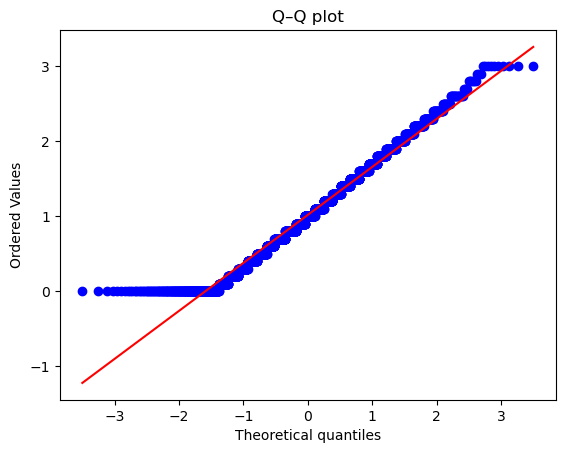

In [219]:
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q–Q plot")
plt.show()

In [ ]:
На основании тестов нельзя говорить, что данные пришли из нормального распределения

# III

In [82]:
Q1, Q3 = np.percentile(data, [25, 75])
IQR = Q3 - Q1
low, high = Q1 - 1.5*IQR, Q3 + 1.5*IQR
data_iqr = data[(data >= low) & (data <= high)]

In [85]:
data_wins = stats.mstats.winsorize(data, limits=[0.05, 0.05])

In [88]:
data_log = np.log(data[data > 0])

In [91]:
data_std = (data - np.mean(data)) / np.std(data, ddof=1)

In [94]:
mean_val = np.mean(data_std)
var_val = np.var(data_std, ddof=1)
mode_val = stats.mode(data_std, keepdims=True)[0][0]
median_val = np.median(data_std)
quantiles = np.quantile(data_std, [0.25, 0.5, 0.75])
skew_val = stats.skew(data_std)
kurt_val = stats.kurtosis(data_std)  
iqr_val = stats.iqr(data_std)

print("1. Среднее:", mean_val)
print("2. Дисперсия:", var_val)
print("3. Мода:", mode_val)
print("4. Медиана:", median_val)
print("5. Квантили:", quantiles)
print("6. Асимметрия:", skew_val)
print("7. Эксцесс:", kurt_val)
print("8. IQR:", iqr_val)

1. Среднее: 3.789561257387201e-17
2. Дисперсия: 0.9999999999999657
3. Мода: -1.5675895635374584
4. Медиана: -0.02519248560621035
5. Квантили: [-0.79639102 -0.02519249  0.74600605]
6. Асимметрия: 0.3400278969043468
7. Эксцесс: -0.39997284929065513
8. IQR: 1.5423970779312481


In [247]:
chi_test(data_std, 1+int(log2(data.shape[0])))

481.57868213366584 nan


False

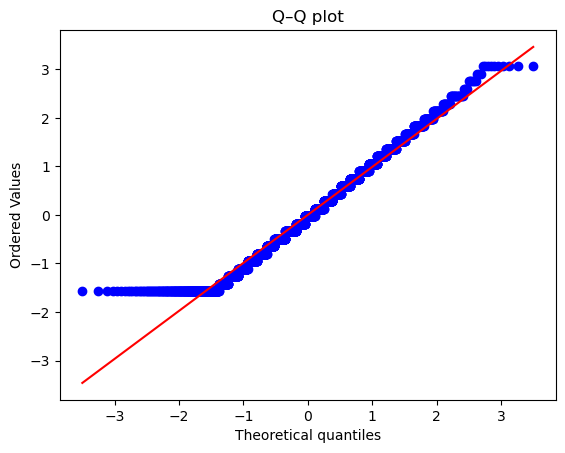

In [137]:
stats.probplot(data_std, dist="norm", plot=plt)
plt.title("Q–Q plot")
plt.show()

In [ ]:
Нам не удалось привести данные к нормальному виду. И у нас все еще тяжелый правый хвост и плоский, по сравнеию с нормальным, пик

# IV

                  mean       var
School_Grade                    
10th          1.028542  0.448710
11th          0.991649  0.409888
12th          1.024008  0.400313
7th           1.021328  0.418375
8th           0.975311  0.423859
9th           1.052662  0.422764


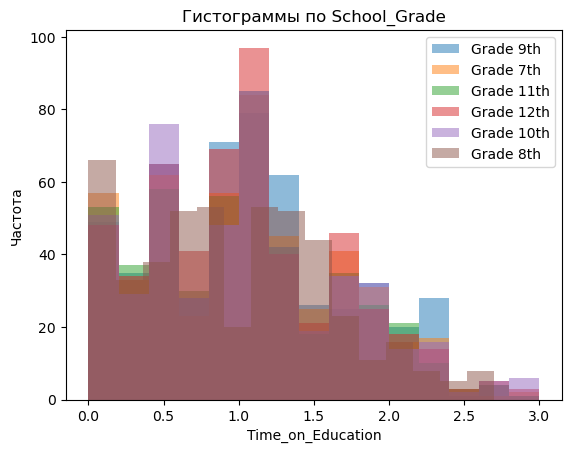

In [110]:
group_col = "School_Grade"

group_stats = df.groupby(group_col)[col].agg(["mean", "var"])
print(group_stats)

grades = df[group_col].unique()
for g in grades:
    subset = df[df[group_col] == g][col]
    plt.hist(subset, bins=15, alpha=0.5, label=f"Grade {g}")

plt.title("Гистограммы по School_Grade")
plt.xlabel(col)
plt.ylabel("Частота")
plt.legend()
plt.show()

In [ ]:
Можно заметить, что средние и дисперсии отличаются слабо, а гистограмма подтверждает, что распределения по форме достаточно похожи

In [ ]:
Это не нормальное распределение соответственно не удалось привести к нормальному распределению